### Importação dos dados



In [ ]:
import pandas as pd

urls = {
    "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
}

loja = pd.read_csv(urls["Loja 1"])
loja2 = pd.read_csv(urls["Loja 2"])
loja3 = pd.read_csv(urls["Loja 3"])
loja4 = pd.read_csv(urls["Loja 4"])

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


,Loja,Faturamento
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


<Axes: title={'center': 'Faturamento por loja'}, xlabel='Total', ylabel='Loja'>

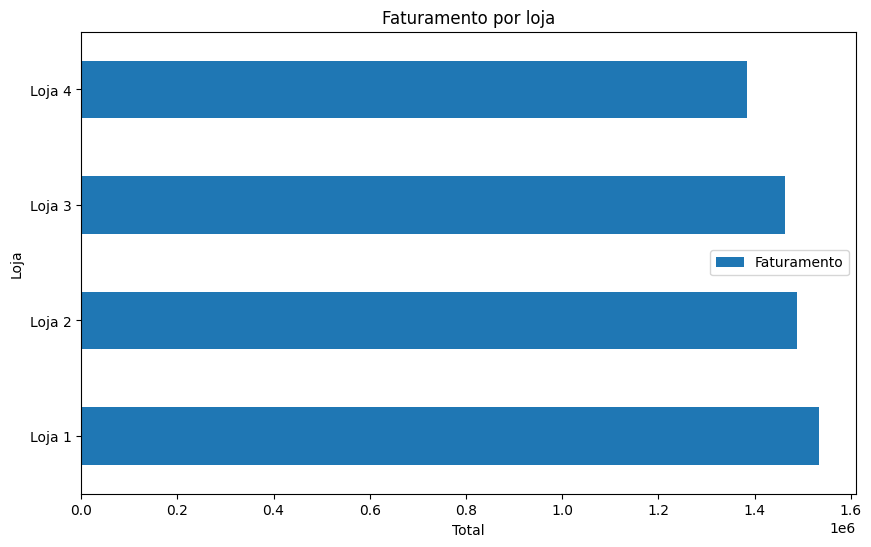

In [96]:
faturamento = {}
for nome, url in urls.items():
    df = pd.read_csv(url)
    faturamento[nome] = df['Preço'].sum()

tabela = pd.DataFrame(list(faturamento.items()), columns=["Loja", "Faturamento"])
tabela = tabela.sort_values(by="Faturamento", ascending=False).reset_index(drop=True)
display(tabela)

tabela.plot(x="Loja", y="Faturamento", kind="barh", title="Faturamento por loja", figsize=(10, 6) , xlabel = 'Total')





# 2. Vendas por Categoria


<Axes: xlabel='Categoria do Produto'>

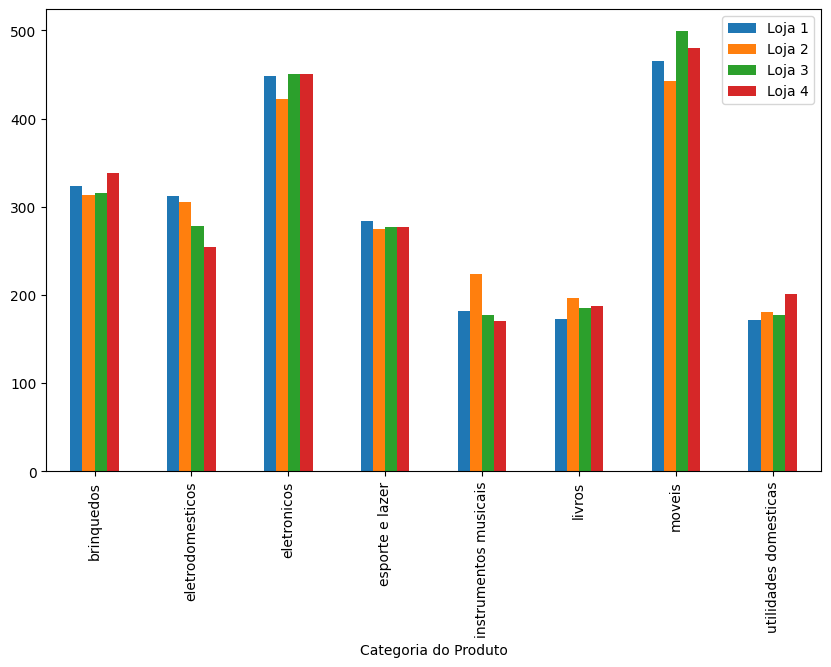

In [77]:
vendas_por_categoria = {}
for nome, url in urls.items():
    df = pd.read_csv(url)
    vendas_por_categoria[nome] = df.groupby('Categoria do Produto')['Produto'].count()


tabela = pd.DataFrame(vendas_por_categoria)
tabela.plot(kind='bar', figsize=(10, 6))

# 3. Média de Avaliação das Lojas

<Axes: xlabel='Categoria do Produto'>

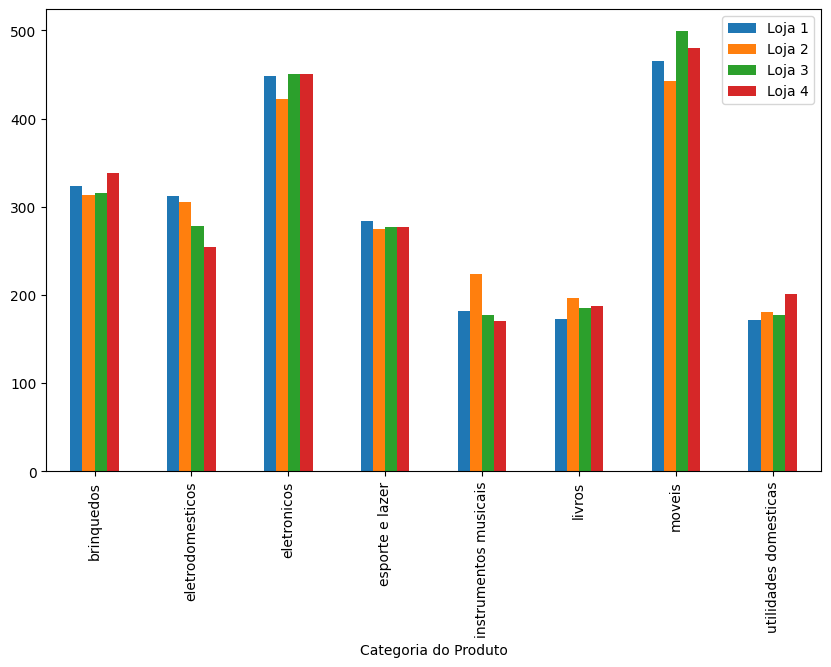

In [78]:
media_avaliacao = {}
for nome, url in urls.items():
   df = pd.read_csv(url)
   media_avaliacao[nome] = df['Avaliação da compra'].mean()

tabela_medias = pd.DataFrame([media_avaliacao])
tabela.plot(kind='bar', figsize=(10, 6))

# 4. Produtos Mais e Menos Vendidos

<Axes: xlabel='Produto'>

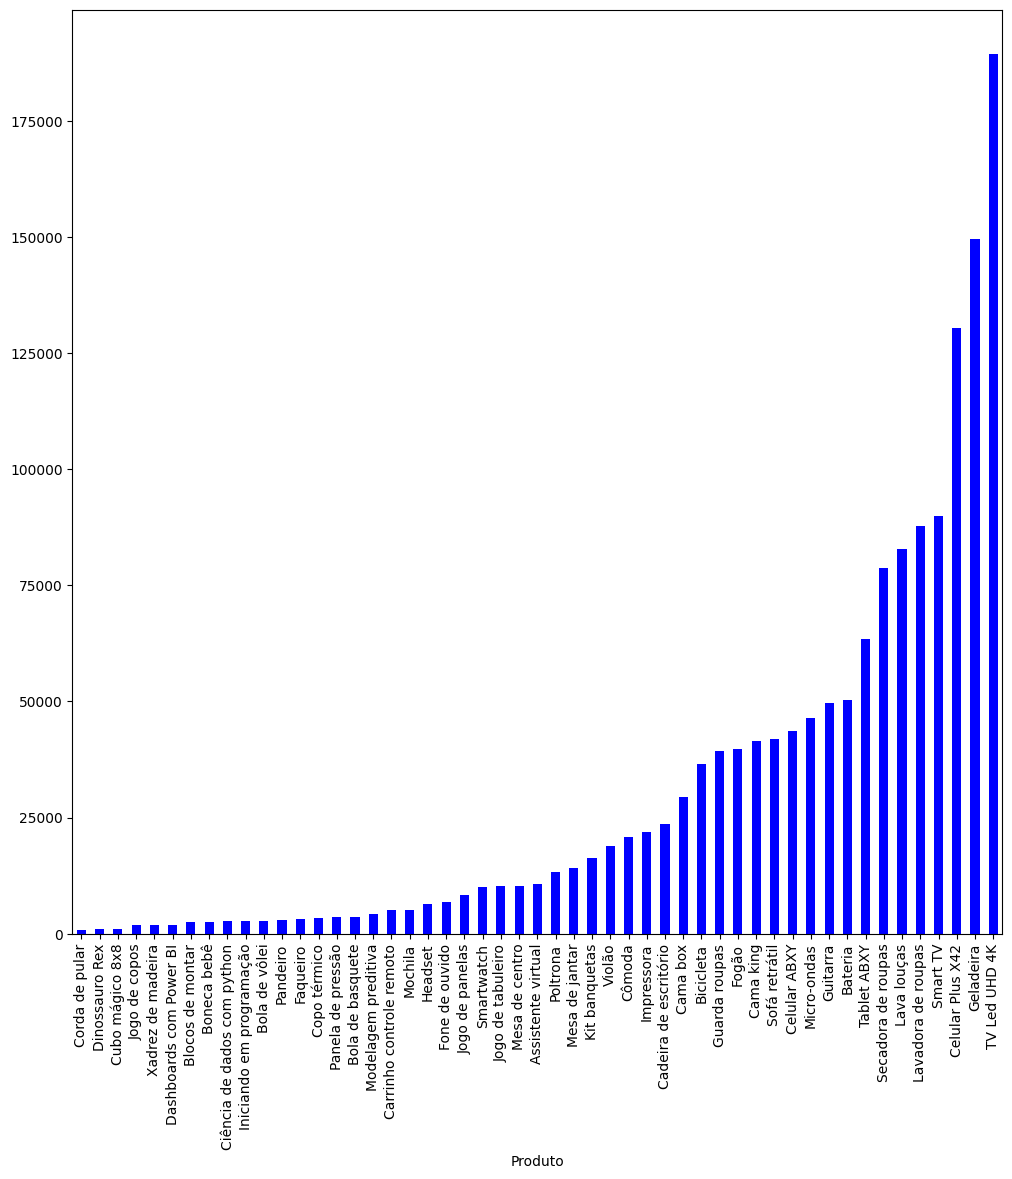

In [84]:
produto_loja1 = loja.groupby("Produto")['Preço'].sum().sort_values()
produto_loja1.plot( kind='bar',figsize=(12,12), color='blue')

<Axes: xlabel='Produto'>

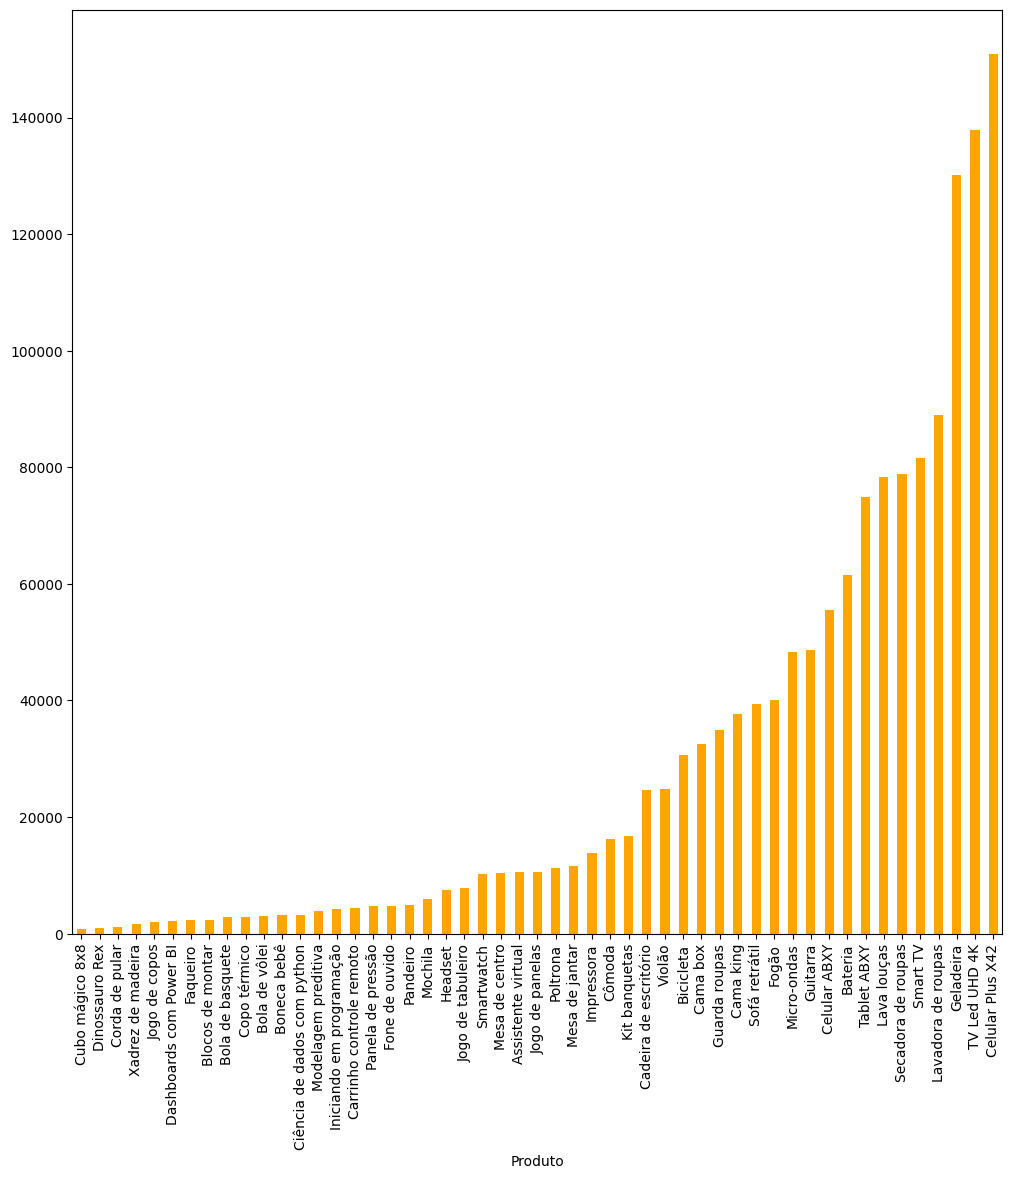

In [85]:
produto_loja2 = loja2.groupby("Produto")['Preço'].sum().sort_values()
produto_loja2.plot( kind='bar',figsize=(12,12), color='orange')

<Axes: xlabel='Produto'>

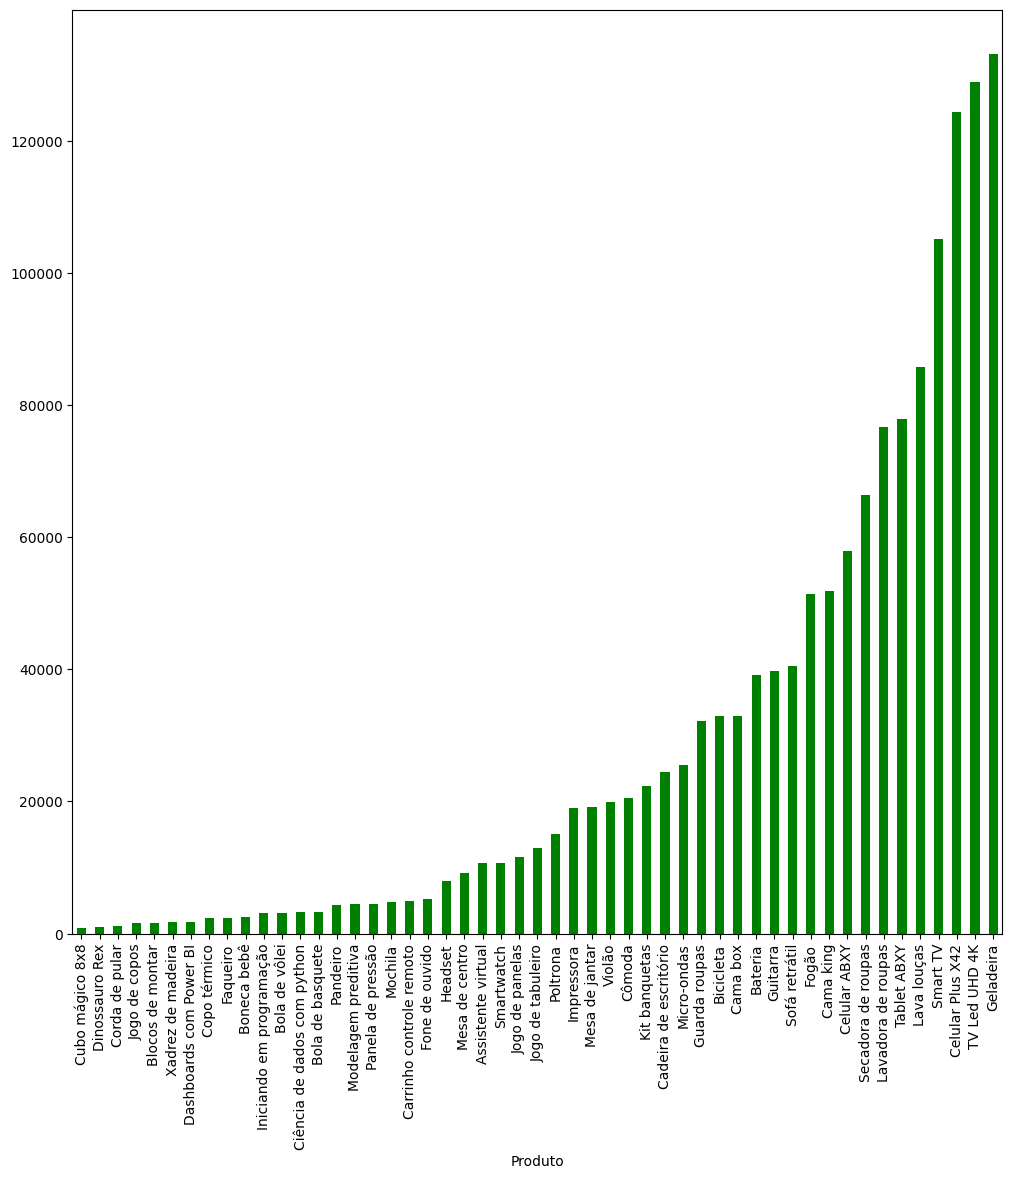

In [86]:
produto_loja3 = loja3.groupby("Produto")['Preço'].sum().sort_values()
produto_loja3.plot( kind='bar',figsize=(12,12), color='green')

<Axes: xlabel='Produto'>

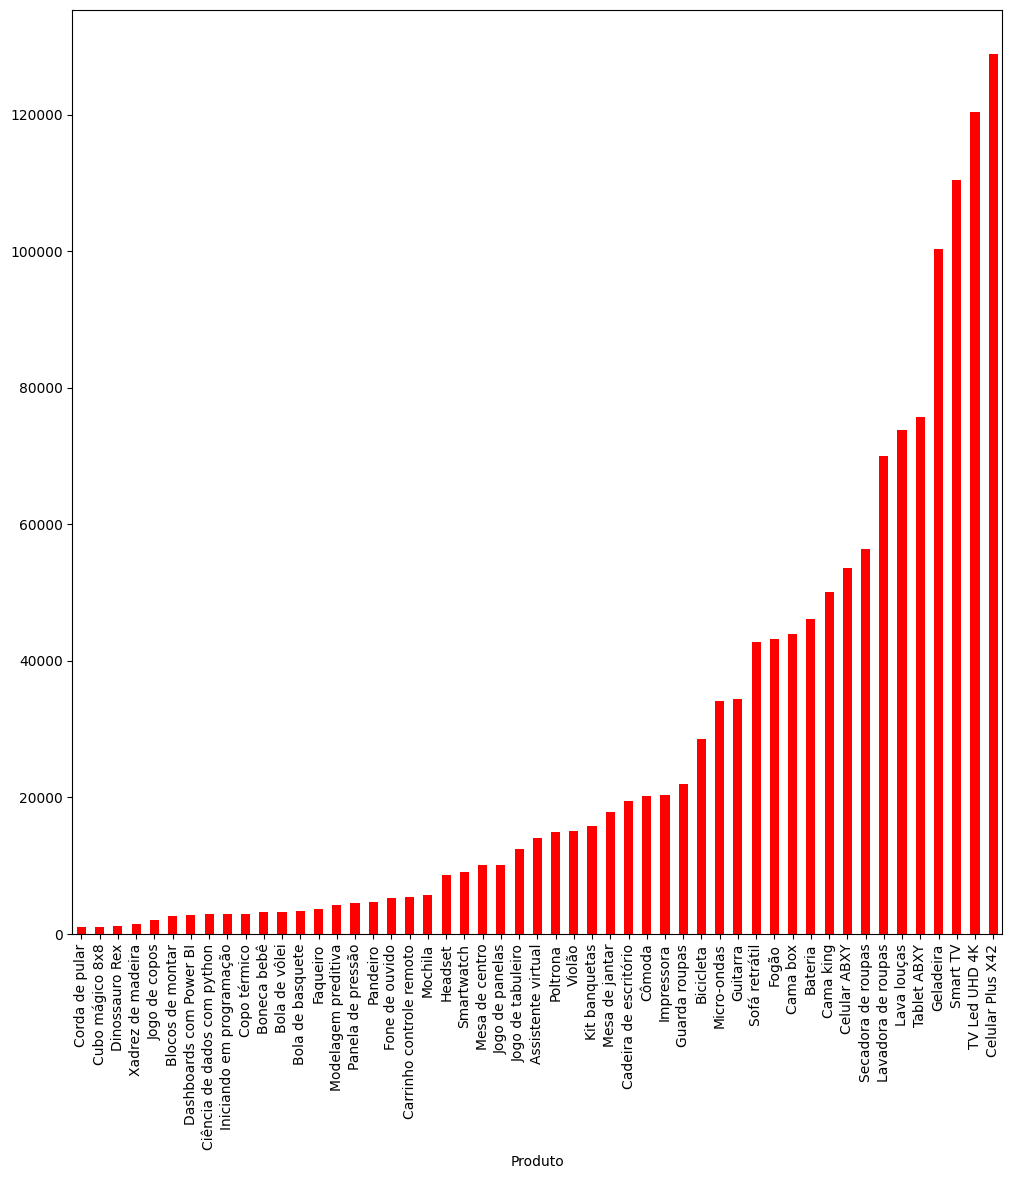

In [88]:
produto_loja4 = loja4.groupby("Produto")['Preço'].sum().sort_values()
produto_loja4.plot( kind='bar',figsize=(12,12), color='red')

# 5. Frete Médio por Loja


,Loja 1,Loja 2,Loja 3,Loja 4
0,34.691805,33.621941,33.074464,31.278997


<Axes: title={'center': 'Frete médio por loja'}>

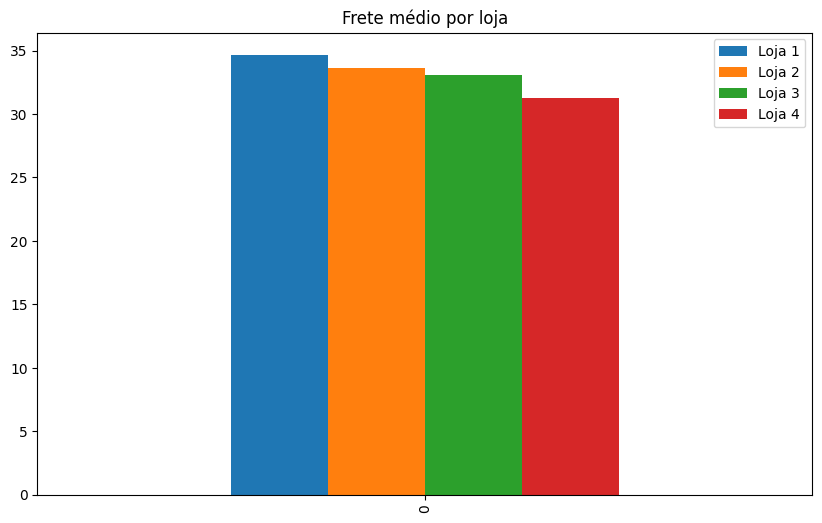

In [92]:
frete_medio = {}
for nome, url in urls.items():
    df = pd.read_csv(url)
    frete_medio[nome] = df['Frete'].mean()
tabela_frete = pd.DataFrame([frete_medio])
display(tabela_frete)

tabela_frete.plot(kind='bar', title = 'Frete médio por loja', figsize=(10, 6))